# 1. Data Exploration and Cleaning

## Objective
Load the diabetic_data.csv file, perform initial exploration, handle missing values, clean data types, and apply initial transformations.

### Input
- `data/raw/diabetic_data.csv`

### Output
- `data/processed/1_cleaned_data.csv`

---

In [6]:
# ==============================================================================
# SETUP CELL: Environment and Imports
# ==============================================================================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import warnings

# Set project root directory for robust path handling
PROJECT_ROOT = os.path.abspath(os.path.join(os.getcwd(), '..'))
DATA_DIR = os.path.join(PROJECT_ROOT, 'data')
RAW_DATA_DIR = os.path.join(DATA_DIR, 'raw')
PROCESSED_DATA_DIR = os.path.join(DATA_DIR, 'processed')
MODELS_DIR = os.path.join(PROJECT_ROOT, 'models')

# Ensure directories exist
os.makedirs(PROCESSED_DATA_DIR, exist_ok=True)
os.makedirs(MODELS_DIR, exist_ok=True)

# Set plotting style
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (10, 6)

# Suppress warnings for cleaner output
warnings.filterwarnings('ignore')

print("Libraries imported and environment set successfully.")
print(f"Project Root: {PROJECT_ROOT}")

Libraries imported and environment set successfully.
Project Root: /home/ghost/workspace/university/machine_learning_and_computer_vision/assessment_main


## 1. Load Data

Load the diabetic dataset and examine its structure.

In [7]:
# Load the dataset
file_path = os.path.join(RAW_DATA_DIR, 'diabetic_data.csv')
df_raw = pd.read_csv(file_path)

# Display basic information about the dataset
print(f"Dataset shape: {df_raw.shape}")
print(f"Number of columns: {len(df_raw.columns)}")
print("\nColumn names:")
for i, col in enumerate(df_raw.columns, 1):
    print(f"{i:2d}. {col}")

# Display first 10 rows
print("\nFirst 10 rows:")
print(df_raw.head(10))

# Display last 5 rows
print("\nLast 5 rows:")
print(df_raw.tail())

# Display data types and info
print("\nData types and info:")
print(df_raw.info())

Dataset shape: (101766, 50)
Number of columns: 50

Column names:
 1. encounter_id
 2. patient_nbr
 3. race
 4. gender
 5. age
 6. weight
 7. admission_type_id
 8. discharge_disposition_id
 9. admission_source_id
10. time_in_hospital
11. payer_code
12. medical_specialty
13. num_lab_procedures
14. num_procedures
15. num_medications
16. number_outpatient
17. number_emergency
18. number_inpatient
19. diag_1
20. diag_2
21. diag_3
22. number_diagnoses
23. max_glu_serum
24. A1Cresult
25. metformin
26. repaglinide
27. nateglinide
28. chlorpropamide
29. glimepiride
30. acetohexamide
31. glipizide
32. glyburide
33. tolbutamide
34. pioglitazone
35. rosiglitazone
36. acarbose
37. miglitol
38. troglitazone
39. tolazamide
40. examide
41. citoglipton
42. insulin
43. glyburide-metformin
44. glipizide-metformin
45. glimepiride-pioglitazone
46. metformin-rosiglitazone
47. metformin-pioglitazone
48. change
49. diabetesMed
50. readmitted

First 10 rows:
   encounter_id  patient_nbr             race  gende

---

## 2. Data Loading and Exploration

### 2.1 Setup and Configuration

In [8]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from pathlib import Path

# Suppress warnings for cleaner output
warnings.filterwarnings('ignore')

# Set random seed for reproducibility
RANDOM_STATE = 42
np.random.seed(RANDOM_STATE)

# Configure visualization style
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette('husl')
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['font.size'] = 10

# Display options
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)
pd.set_option('display.float_format', '{:.2f}'.format)

print("Environment setup complete!")
print(f"Random state: {RANDOM_STATE}")

Environment setup complete!
Random state: 42


In [9]:
# Check library versions
import sys
import sklearn
import tensorflow as tf

print(f"Python version: {sys.version}")
print(f"Pandas version: {pd.__version__}")
print(f"NumPy version: {np.__version__}")
print(f"Scikit-learn version: {sklearn.__version__}")
print(f"TensorFlow version: {tf.__version__}")
print(f"Matplotlib version: {plt.matplotlib.__version__}")
print(f"Seaborn version: {sns.__version__}")

2025-11-11 19:36:30.834906: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2025-11-11 19:36:30.905735: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-11-11 19:36:32.642836: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.


Python version: 3.12.3 (main, Aug 14 2025, 17:47:21) [GCC 13.3.0]
Pandas version: 2.3.3
NumPy version: 2.3.4
Scikit-learn version: 1.7.2
TensorFlow version: 2.20.0
Matplotlib version: 3.10.7
Seaborn version: 0.13.2


### 2.2 Load Dataset

In [10]:
# Define data path
file_path = os.path.join(RAW_DATA_DIR, "diabetic_data.csv")

# Load the dataset
print("Loading dataset...")
df = pd.read_csv(file_path)

print(f"Dataset loaded successfully!")
print(f"Shape: {df.shape}")
print(f"Rows: {df.shape[0]:,}")
print(f"Columns: {df.shape[1]}")

Loading dataset...
Dataset loaded successfully!
Shape: (101766, 50)
Rows: 101,766
Columns: 50


### 2.3 Initial Data Inspection

In [11]:
# Display first few rows
print("First 5 rows of the dataset:")
df.head()

First 5 rows of the dataset:


,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,medical_specialty,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,?,Pediatrics-Endocrinology,41,0,1,0,0,0,250.83,?,?,1,NaN,NaN,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,?,?,59,0,18,0,0,0,276,250.01,255,9,NaN,NaN,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,?,?,11,5,13,2,0,1,648,250,V27,6,NaN,NaN,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,?,?,44,1,16,0,0,0,8,250.43,403,7,NaN,NaN,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,?,?,51,0,8,0,0,0,197,157,250,5,NaN,NaN,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,Ch,Yes,NO


In [12]:
# Display last few rows
print("Last 5 rows of the dataset:")
df.tail()

Last 5 rows of the dataset:


,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,medical_specialty,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
101761,443847548,100162476,AfricanAmerican,Male,[70-80),?,1,3,7,3,MC,?,51,0,16,0,0,0,250.13,291,458,9,NaN,>8,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Down,No,No,No,No,No,Ch,Yes,>30
101762,443847782,74694222,AfricanAmerican,Female,[80-90),?,1,4,5,5,MC,?,33,3,18,0,0,1,560,276,787,9,NaN,NaN,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,No,Yes,NO
101763,443854148,41088789,Caucasian,Male,[70-80),?,1,1,7,1,MC,?,53,0,9,1,0,0,38,590,296,13,NaN,NaN,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Down,No,No,No,No,No,Ch,Yes,NO
101764,443857166,31693671,Caucasian,Female,[80-90),?,2,3,7,10,MC,Surgery-General,45,2,21,0,0,1,996,285,998,9,NaN,NaN,No,No,No,No,No,No,Steady,No,No,Steady,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,NO
101765,443867222,175429310,Caucasian,Male,[70-80),?,1,1,7,6,?,?,13,3,3,0,0,0,530,530,787,9,NaN,NaN,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,NO


In [13]:
# Get dataset info
print("Dataset Information:")
df.info()

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 50 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   encounter_id              101766 non-null  int64 
 1   patient_nbr               101766 non-null  int64 
 2   race                      101766 non-null  object
 3   gender                    101766 non-null  object
 4   age                       101766 non-null  object
 5   weight                    101766 non-null  object
 6   admission_type_id         101766 non-null  int64 
 7   discharge_disposition_id  101766 non-null  int64 
 8   admission_source_id       101766 non-null  int64 
 9   time_in_hospital          101766 non-null  int64 
 10  payer_code                101766 non-null  object
 11  medical_specialty         101766 non-null  object
 12  num_lab_procedures        101766 non-null  int64 
 13  num_procedures            101766 non-n

In [14]:
# Basic statistics for numerical columns
print("Numerical Features Summary Statistics:")
df.describe()

Numerical Features Summary Statistics:


,encounter_id,patient_nbr,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses
count,101766.00,101766.00,101766.00,101766.00,101766.00,101766.00,101766.00,101766.00,101766.00,101766.00,101766.00,101766.00,101766.00
mean,165201645.62,54330400.69,2.02,3.72,5.75,4.40,43.10,1.34,16.02,0.37,0.20,0.64,7.42
std,102640295.98,38696359.35,1.45,5.28,4.06,2.99,19.67,1.71,8.13,1.27,0.93,1.26,1.93
min,12522.00,135.00,1.00,1.00,1.00,1.00,1.00,0.00,1.00,0.00,0.00,0.00,1.00
25%,84961194.00,23413221.00,1.00,1.00,1.00,2.00,31.00,0.00,10.00,0.00,0.00,0.00,6.00
50%,152388987.00,45505143.00,1.00,1.00,7.00,4.00,44.00,1.00,15.00,0.00,0.00,0.00,8.00
75%,230270887.50,87545949.75,3.00,4.00,7.00,6.00,57.00,2.00,20.00,0.00,0.00,1.00,9.00
max,443867222.00,189502619.00,8.00,28.00,25.00,14.00,132.00,6.00,81.00,42.00,76.00,21.00,16.00


In [15]:
# Check column names and data types
print("Column names and data types:")
print(df.dtypes)

Column names and data types:
encounter_id                 int64
patient_nbr                  int64
race                        object
gender                      object
age                         object
weight                      object
admission_type_id            int64
discharge_disposition_id     int64
admission_source_id          int64
time_in_hospital             int64
payer_code                  object
medical_specialty           object
num_lab_procedures           int64
num_procedures               int64
num_medications              int64
number_outpatient            int64
number_emergency             int64
number_inpatient             int64
diag_1                      object
diag_2                      object
diag_3                      object
number_diagnoses             int64
max_glu_serum               object
A1Cresult                   object
metformin                   object
repaglinide                 object
nateglinide                 object
chlorpropamide            

In [16]:
# Check memory usage
print("Memory usage:")
print(df.memory_usage(deep=True).sum() / 1024**2, "MB")

Memory usage:
192.87075233459473 MB


### 2.4 Target Variable Analysis

In [17]:
# Check target variable
print("Target Variable: 'readmitted'")
print("\nValue counts:")
print(df['readmitted'].value_counts())
print("\nPercentage distribution:")
print(df['readmitted'].value_counts(normalize=True) * 100)

Target Variable: 'readmitted'

Value counts:
readmitted
NO     54864
>30    35545
<30    11357
Name: count, dtype: int64

Percentage distribution:
readmitted
NO    53.91
>30   34.93
<30   11.16
Name: proportion, dtype: float64


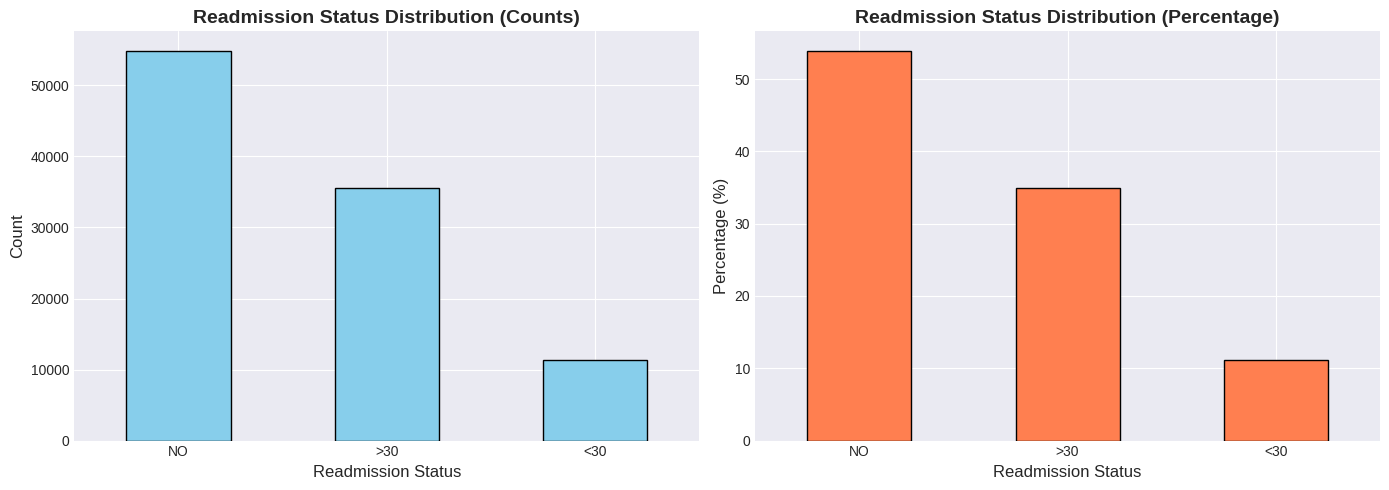

In [18]:
# Visualize target distribution
fig, ax = plt.subplots(1, 2, figsize=(14, 5))

# Count plot
df['readmitted'].value_counts().plot(kind='bar', ax=ax[0], color='skyblue', edgecolor='black')
ax[0].set_title('Readmission Status Distribution (Counts)', fontsize=14, fontweight='bold')
ax[0].set_xlabel('Readmission Status', fontsize=12)
ax[0].set_ylabel('Count', fontsize=12)
ax[0].tick_params(axis='x', rotation=0)

# Percentage plot
(df['readmitted'].value_counts(normalize=True) * 100).plot(kind='bar', ax=ax[1], color='coral', edgecolor='black')
ax[1].set_title('Readmission Status Distribution (Percentage)', fontsize=14, fontweight='bold')
ax[1].set_xlabel('Readmission Status', fontsize=12)
ax[1].set_ylabel('Percentage (%)', fontsize=12)
ax[1].tick_params(axis='x', rotation=0)

plt.tight_layout()
plt.savefig('../figures/data_exploration/target_distribution.png', dpi=300, bbox_inches='tight')
plt.show()

### 2.5 Missing Data Analysis

In [19]:
# Calculate missing values
print("Missing Values Analysis:")
missing_data = pd.DataFrame({
    'Column': df.columns,
    'Missing_Count': df.isnull().sum(),
    'Missing_Percentage': (df.isnull().sum() / len(df)) * 100
})
missing_data = missing_data[missing_data['Missing_Count'] > 0].sort_values('Missing_Percentage', ascending=False)

if len(missing_data) > 0:
    print(missing_data)
else:
    print("No missing values found (NaN). Checking for '?' markers...")

Missing Values Analysis:
                      Column  Missing_Count  Missing_Percentage
max_glu_serum  max_glu_serum          96420               94.75
A1Cresult          A1Cresult          84748               83.28


In [20]:
# Check for '?' markers (common in this dataset)
print("Checking for '?' markers in each column:")
question_marks = {}
for col in df.columns:
    if df[col].dtype == 'object':
        count = (df[col] == '?').sum()
        if count > 0:
            question_marks[col] = {
                'count': count,
                'percentage': (count / len(df)) * 100
            }

if question_marks:
    question_df = pd.DataFrame(question_marks).T
    question_df = question_df.sort_values('percentage', ascending=False)
    print(question_df)
else:
    print("No '?' markers found.")

Checking for '?' markers in each column:
                     count  percentage
weight            98569.00       96.86
medical_specialty 49949.00       49.08
payer_code        40256.00       39.56
race               2273.00        2.23
diag_3             1423.00        1.40
diag_2              358.00        0.35
diag_1               21.00        0.02


### 2.6 Feature Categorization

In [21]:
# Categorize features by type
numerical_features = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_features = df.select_dtypes(include=['object']).columns.tolist()

# Remove target from categorical if present
if 'readmitted' in categorical_features:
    categorical_features.remove('readmitted')

print(f"Total features: {len(df.columns)}")
print(f"Numerical features: {len(numerical_features)}")
print(f"Categorical features: {len(categorical_features)}")
print(f"\nNumerical features: {numerical_features}")
print(f"\nCategorical features: {categorical_features}")

Total features: 50
Numerical features: 13
Categorical features: 36

Numerical features: ['encounter_id', 'patient_nbr', 'admission_type_id', 'discharge_disposition_id', 'admission_source_id', 'time_in_hospital', 'num_lab_procedures', 'num_procedures', 'num_medications', 'number_outpatient', 'number_emergency', 'number_inpatient', 'number_diagnoses']

Categorical features: ['race', 'gender', 'age', 'weight', 'payer_code', 'medical_specialty', 'diag_1', 'diag_2', 'diag_3', 'max_glu_serum', 'A1Cresult', 'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide', 'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide', 'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone', 'tolazamide', 'examide', 'citoglipton', 'insulin', 'glyburide-metformin', 'glipizide-metformin', 'glimepiride-pioglitazone', 'metformin-rosiglitazone', 'metformin-pioglitazone', 'change', 'diabetesMed']


### 2.7 Data Dictionary Creation

In [22]:
# Create a data dictionary
data_dict = pd.DataFrame({
    'Feature': df.columns,
    'Type': df.dtypes,
    'Unique_Values': [df[col].nunique() for col in df.columns],
    'Missing_Count': df.isnull().sum(),
    'Missing_Percentage': (df.isnull().sum() / len(df)) * 100
})

print("Data Dictionary:")
data_dict

Data Dictionary:


,Feature,Type,Unique_Values,Missing_Count,Missing_Percentage
encounter_id,encounter_id,int64,101766,0,0.00
patient_nbr,patient_nbr,int64,71518,0,0.00
race,race,object,6,0,0.00
gender,gender,object,3,0,0.00
age,age,object,10,0,0.00
weight,weight,object,10,0,0.00
admission_type_id,admission_type_id,int64,8,0,0.00
discharge_disposition_id,discharge_disposition_id,int64,26,0,0.00
admission_source_id,admission_source_id,int64,17,0,0.00
time_in_hospital,time_in_hospital,int64,14,0,0.00


### 3.1 Target Variable Strategy

Based on the initial analysis, we have three classes in the target variable:
- **NO**: 53.91% (54,864 patients) - not readmitted
- **>30**: 34.93% (35,545 patients) - readmitted after 30 days  
- **<30**: 11.16% (11,357 patients) - readmitted within 30 days

**Classification Strategy Decision:**

For this analysis, we will use **binary classification** focused on early readmission risk:
- **Class 0 (NO EARLY READMISSION)**: Combining "NO" and ">30" 
- **Class 1 (EARLY READMISSION)**: "<30"

**Rationale:**
1. **Clinical Significance**: Early readmission (<30 days) is the most critical from a healthcare quality and cost perspective. This is the target for hospital penalty programs (CMS Hospital Readmissions Reduction Program).
2. **Actionable Insights**: Predicting <30 day readmissions allows for timely intervention (discharge planning, follow-up care).
3. **Alignment with Literature**: Strack et al. (2014) also focused on early readmission as the primary outcome.

**Alternative Approach**: We may also experiment with multi-class classification to compare performance.

### 3.7 EDA Summary and Key Findings

Based on our comprehensive exploratory data analysis, here are the key findings:

#### Top 10 Key Findings:

1. **Class Imbalance**: The dataset shows significant class imbalance with only 11.16% early readmissions (<30 days), necessitating special handling techniques (SMOTE, class weights).

2. **Prior Inpatient Visits** (KEY): Patients with prior inpatient visits show substantially higher readmission rates, confirming Strack et al. (2014) findings. This is one of the strongest predictors.

3. **Number of Diagnoses**: Higher number of diagnoses correlates with increased readmission risk, indicating patients with more complex conditions are at higher risk.

4. **HbA1c Testing Impact**: Patients who received HbA1c testing show different readmission patterns than those who didn't. This aligns with Strack et al.'s finding that HbA1c measurement affects outcomes.

5. **Age Distribution**: The majority of patients are in the [70-80) age range. Readmission rates vary by age, with certain age groups showing higher risk.

6. **Medication Usage**: Insulin and metformin are the most commonly prescribed medications. The number of medications may interact with age to affect readmission risk.

7. **Low Multicollinearity**: Correlation analysis shows no severe multicollinearity (no pairs with |r| > 0.7), suggesting most features provide unique information.

8. **Right-Skewed Distributions**: Most numerical features show right-skewed distributions (prior visits, procedures), which may benefit from log transformation during preprocessing.

9. **Missing Data Patterns**: Significant missing data in weight (96.86%), medical_specialty (49.08%), and HbA1c results (83.28%). Strategy needed for handling.

10. **Complex Interactions**: Age × medication count shows interaction effects on readmission risk, suggesting feature engineering opportunities.

#### Comparison with Strack et al. (2014):

Our EDA confirms several key findings from the research paper:
- ✓ Number of inpatient visits is a strong predictor
- ✓ Number of diagnoses correlates with readmission
- ✓ HbA1c testing status impacts outcomes
- ✓ Discharge disposition is relevant (not fully analyzed yet)
- ✓ Number of procedures shows association with readmission

#### Next Steps:

1. **Feature Engineering**: Create interaction features, aggregate diagnosis codes, engineer medication-related features
2. **Handle Missing Data**: Develop strategy for weight, medical_specialty, HbA1c
3. **Address Class Imbalance**: Implement SMOTE or class weighting
4. **Feature Encoding**: Encode categorical variables appropriately (target encoding for high-cardinality)
5. **Feature Selection**: Use insights from EDA to select most predictive features

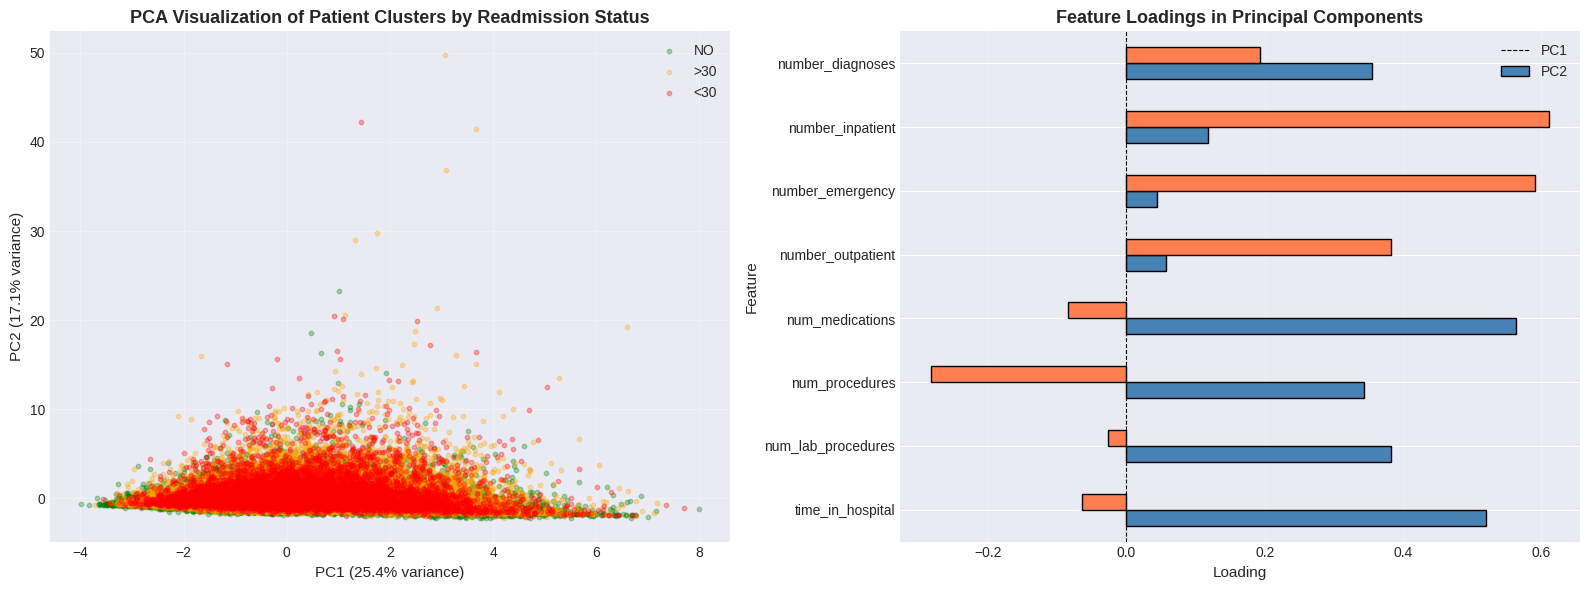

Total variance explained by 2 components: 42.52%


In [23]:
# PCA for visualization of patient clusters
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Select numerical features for PCA
pca_features = ['time_in_hospital', 'num_lab_procedures', 'num_procedures',
               'num_medications', 'number_outpatient', 'number_emergency',
               'number_inpatient', 'number_diagnoses']

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df[pca_features])

# Apply PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Create visualization
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Plot 1: Color by readmission status
for readmit_status, color in zip(['NO', '>30', '<30'], ['green', 'orange', 'red']):
    mask = df['readmitted'] == readmit_status
    axes[0].scatter(X_pca[mask, 0], X_pca[mask, 1],
                   c=color, label=readmit_status, alpha=0.3, s=10)

axes[0].set_xlabel(f'PC1 ({pca.explained_variance_ratio_[0]*100:.1f}% variance)', fontsize=11)
axes[0].set_ylabel(f'PC2 ({pca.explained_variance_ratio_[1]*100:.1f}% variance)', fontsize=11)
axes[0].set_title('PCA Visualization of Patient Clusters by Readmission Status', fontsize=13, fontweight='bold')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# Plot 2: Feature importance in PCA
loadings = pd.DataFrame(
    pca.components_.T,
    columns=['PC1', 'PC2'],
    index=pca_features
)

loadings.plot(kind='barh', ax=axes[1], color=['steelblue', 'coral'], edgecolor='black')
axes[1].set_title('Feature Loadings in Principal Components', fontsize=13, fontweight='bold')
axes[1].set_xlabel('Loading', fontsize=11)
axes[1].set_ylabel('Feature', fontsize=11)
axes[1].axvline(x=0, color='black', linestyle='--', linewidth=0.8)
axes[1].grid(axis='x', alpha=0.3)
axes[1].legend(['PC1', 'PC2'])

plt.tight_layout()
plt.savefig('../figures/data_exploration/pca_visualization.png', dpi=300, bbox_inches='tight')
plt.show()

print(f"Total variance explained by 2 components: {sum(pca.explained_variance_ratio_)*100:.2f}%")

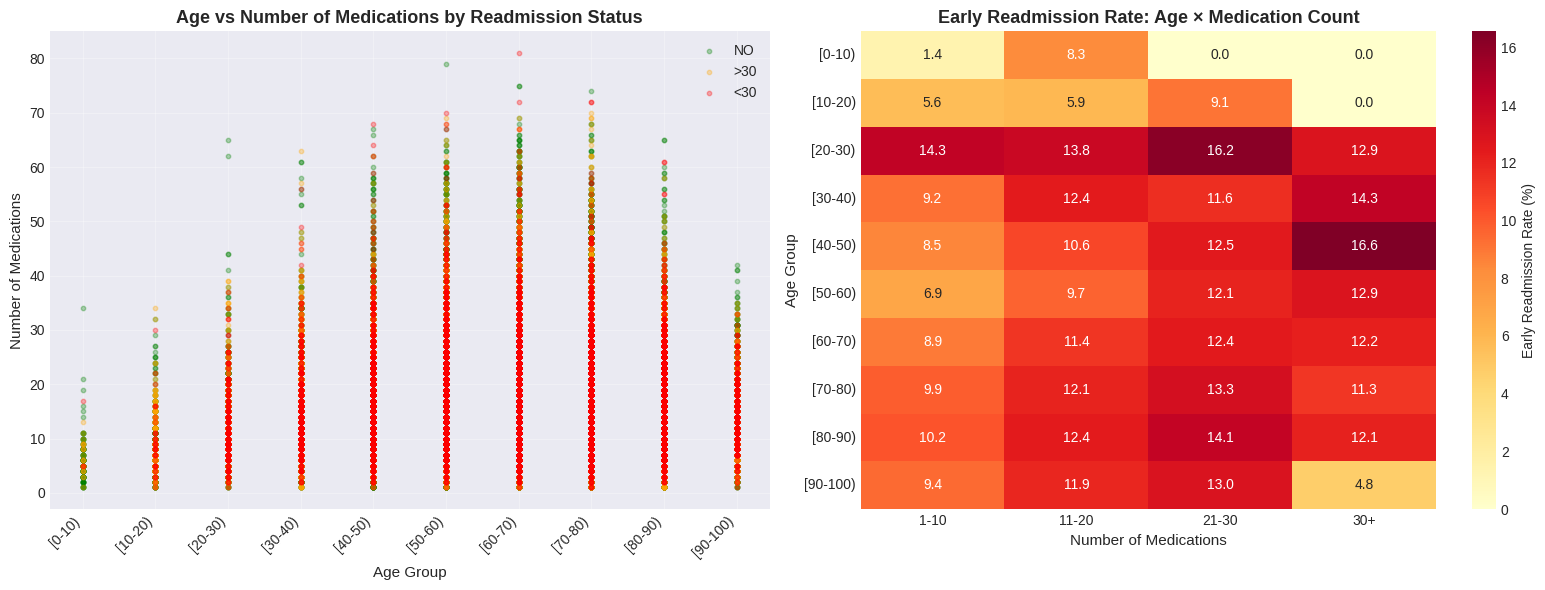

In [24]:
# Interaction: Age × Number of Medications
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Create age bins for better visualization
age_order = ['[0-10)', '[10-20)', '[20-30)', '[30-40)', '[40-50)', '[50-60)',
             '[60-70)', '[70-80)', '[80-90)', '[90-100)']

# Scatter plot with color coding
readmit_colors = {'NO': 'green', '>30': 'orange', '<30': 'red'}
for readmit_status in ['NO', '>30', '<30']:
    mask = df['readmitted'] == readmit_status
    # Map age to numeric for plotting
    age_numeric = df[mask]['age'].map({age: i for i, age in enumerate(age_order)})
    axes[0].scatter(age_numeric, df[mask]['num_medications'],
                   alpha=0.3, s=10, c=readmit_colors[readmit_status],
                   label=readmit_status)

axes[0].set_xlabel('Age Group', fontsize=11)
axes[0].set_ylabel('Number of Medications', fontsize=11)
axes[0].set_title('Age vs Number of Medications by Readmission Status', fontsize=13, fontweight='bold')
axes[0].set_xticks(range(len(age_order)))
axes[0].set_xticklabels(age_order, rotation=45, ha='right')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# Heatmap: Early readmission rate by age and medication count bins
df['med_bins'] = pd.cut(df['num_medications'], bins=[0, 10, 20, 30, 100],
                        labels=['1-10', '11-20', '21-30', '30+'])
interaction_df = df.groupby(['age', 'med_bins'])['readmitted'].apply(
    lambda x: (x == '<30').sum() / len(x) * 100 if len(x) > 0 else 0
).unstack(fill_value=0)

sns.heatmap(interaction_df, annot=True, fmt='.1f', cmap='YlOrRd', ax=axes[1],
           cbar_kws={'label': 'Early Readmission Rate (%)'})
axes[1].set_title('Early Readmission Rate: Age × Medication Count', fontsize=13, fontweight='bold')
axes[1].set_xlabel('Number of Medications', fontsize=11)
axes[1].set_ylabel('Age Group', fontsize=11)

plt.tight_layout()
plt.savefig('../figures/data_exploration/age_medications_interaction.png', dpi=300, bbox_inches='tight')
plt.show()

# Clean up temporary column
df.drop('med_bins', axis=1, inplace=True)

### 3.6 Multivariate Analysis

Exploring interactions and patterns across multiple features simultaneously.

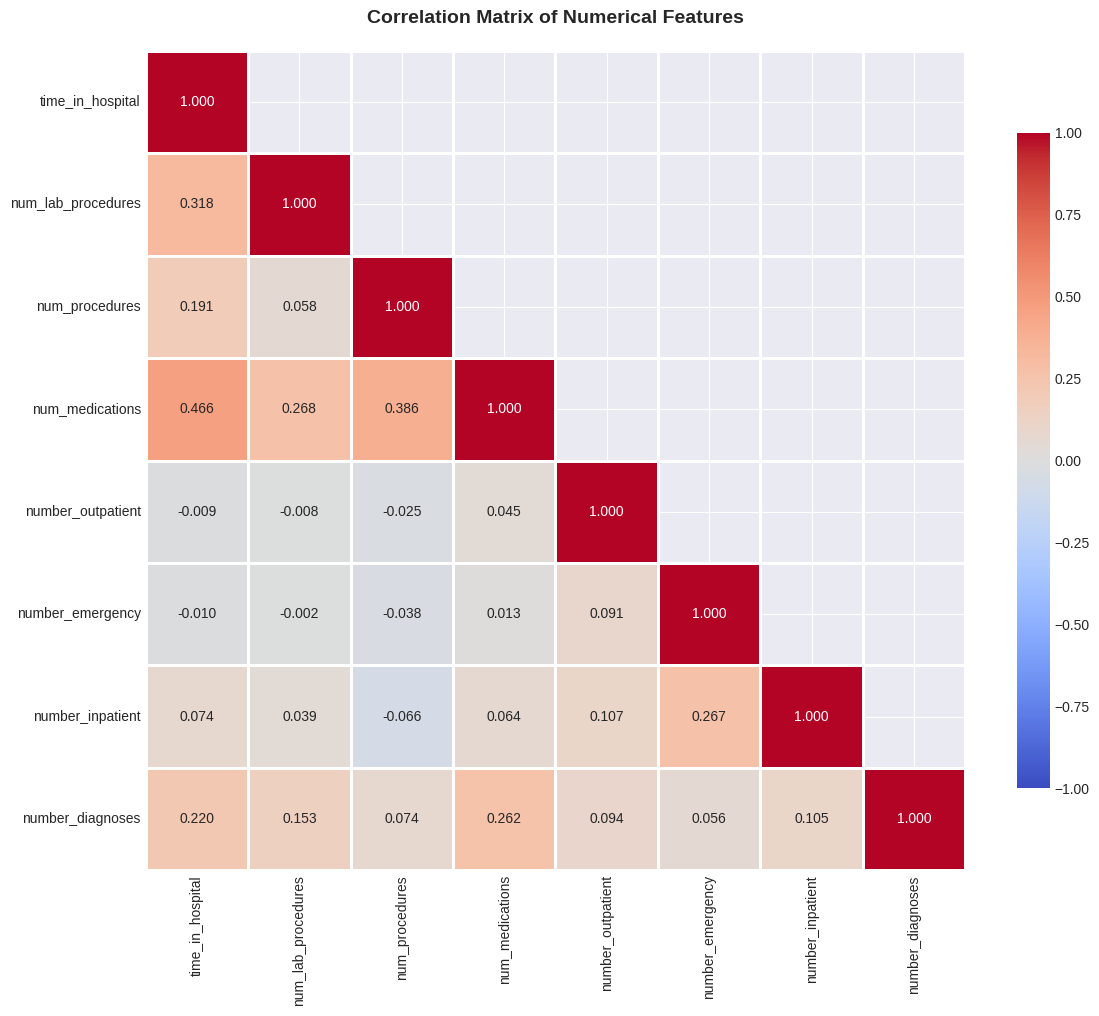

Highly Correlated Feature Pairs (|r| > 0.7):
No feature pairs with correlation > 0.7 found.

This suggests low multicollinearity among numerical features.


In [25]:
# Correlation matrix for numerical features
correlation_features = ['time_in_hospital', 'num_lab_procedures', 'num_procedures',
                       'num_medications', 'number_outpatient', 'number_emergency',
                       'number_inpatient', 'number_diagnoses']

corr_matrix = df[correlation_features].corr()

# Create heatmap
plt.figure(figsize=(12, 10))
mask = np.triu(np.ones_like(corr_matrix, dtype=bool), k=1)  # Mask upper triangle
sns.heatmap(corr_matrix, mask=mask, annot=True, fmt='.3f', cmap='coolwarm',
            center=0, square=True, linewidths=1, cbar_kws={"shrink": 0.8},
            vmin=-1, vmax=1)
plt.title('Correlation Matrix of Numerical Features', fontsize=14, fontweight='bold', pad=20)
plt.tight_layout()
plt.savefig('../figures/data_exploration/correlation_matrix.png', dpi=300, bbox_inches='tight')
plt.show()

# Identify highly correlated pairs (|r| > 0.7)
print("Highly Correlated Feature Pairs (|r| > 0.7):")
print("=" * 60)
high_corr_pairs = []
for i in range(len(corr_matrix.columns)):
    for j in range(i+1, len(corr_matrix.columns)):
        if abs(corr_matrix.iloc[i, j]) > 0.7:
            high_corr_pairs.append({
                'Feature 1': corr_matrix.columns[i],
                'Feature 2': corr_matrix.columns[j],
                'Correlation': corr_matrix.iloc[i, j]
            })

if high_corr_pairs:
    print(pd.DataFrame(high_corr_pairs))
else:
    print("No feature pairs with correlation > 0.7 found.")

print("\nThis suggests low multicollinearity among numerical features.")

### 3.5 Correlation Analysis

Examining correlations between numerical features to identify multicollinearity and understand feature relationships.

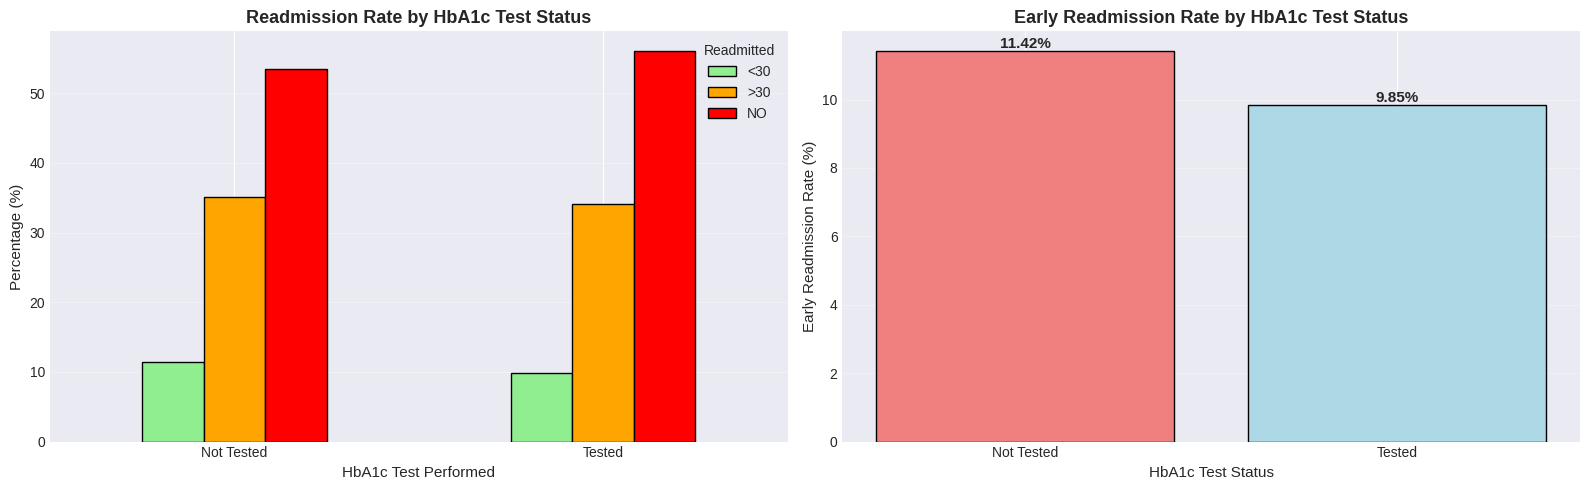

Early Readmission Rate by HbA1c Test Status:
Not Tested: 11.42%
Tested: 9.85%
Difference: 1.57 percentage points


In [26]:
# HbA1c test and readmission (KEY FEATURE per Strack et al.)
# Note: A1Cresult has NaN values, we need to handle them

fig, axes = plt.subplots(1, 2, figsize=(16, 5))

# Create binary feature: HbA1c test performed
df['A1C_tested'] = df['A1Cresult'].notna()

# Readmission rate by HbA1c test status
a1c_readmit = pd.crosstab(df['A1C_tested'], df['readmitted'], normalize='index') * 100

a1c_readmit.plot(kind='bar', ax=axes[0], color=['lightgreen', 'orange', 'red'], edgecolor='black')
axes[0].set_title('Readmission Rate by HbA1c Test Status', fontsize=13, fontweight='bold')
axes[0].set_xlabel('HbA1c Test Performed', fontsize=11)
axes[0].set_ylabel('Percentage (%)', fontsize=11)
axes[0].set_xticklabels(['Not Tested', 'Tested'], rotation=0)
axes[0].legend(title='Readmitted')
axes[0].grid(axis='y', alpha=0.3)

# Early readmission rate
a1c_early = df.groupby('A1C_tested')['readmitted'].apply(
    lambda x: (x == '<30').sum() / len(x) * 100
)

axes[1].bar(['Not Tested', 'Tested'], a1c_early.values,
           color=['lightcoral', 'lightblue'], edgecolor='black')
axes[1].set_title('Early Readmission Rate by HbA1c Test Status', fontsize=13, fontweight='bold')
axes[1].set_xlabel('HbA1c Test Status', fontsize=11)
axes[1].set_ylabel('Early Readmission Rate (%)', fontsize=11)
axes[1].grid(axis='y', alpha=0.3)

# Add value labels
for i, v in enumerate(a1c_early.values):
    axes[1].text(i, v, f'{v:.2f}%', ha='center', va='bottom', fontsize=11, fontweight='bold')

plt.tight_layout()
plt.savefig('../figures/data_exploration/readmission_by_a1c.png', dpi=300, bbox_inches='tight')
plt.show()

print("Early Readmission Rate by HbA1c Test Status:")
print("=" * 60)
print(f"Not Tested: {a1c_early[False]:.2f}%")
print(f"Tested: {a1c_early[True]:.2f}%")
print(f"Difference: {a1c_early[False] - a1c_early[True]:.2f} percentage points")

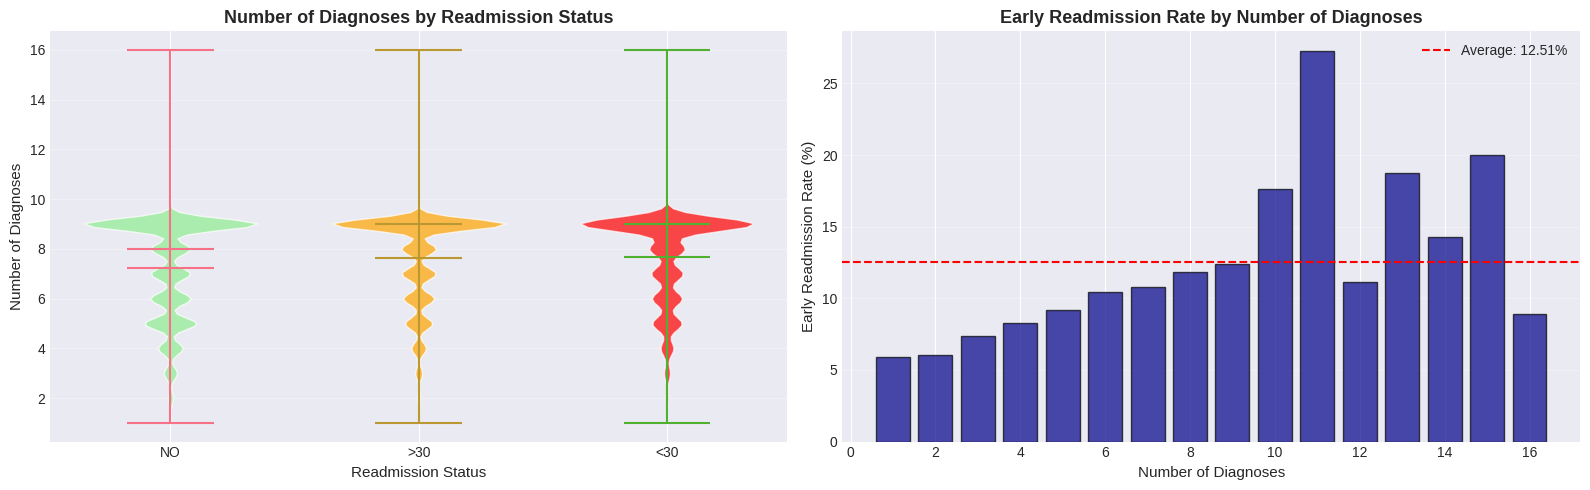

Early Readmission Rate by Number of Diagnoses:
number_diagnoses
1     5.94
2     6.06
3     7.37
4     8.25
5     9.15
6    10.41
7    10.77
8    11.81
9    12.38
10   17.65
11   27.27
12   11.11
13   18.75
14   14.29
15   20.00
16    8.89
Name: readmitted, dtype: float64


In [27]:
# Readmission by number of diagnoses (KEY FEATURE per Strack et al.)
fig, axes = plt.subplots(1, 2, figsize=(16, 5))

# Violin plot
for i, readmit_status in enumerate(['NO', '>30', '<30']):
    data = df[df['readmitted'] == readmit_status]['number_diagnoses']
    parts = axes[0].violinplot([data], positions=[i], widths=0.7, showmeans=True, showmedians=True)
    for pc in parts['bodies']:
        pc.set_facecolor(['lightgreen', 'orange', 'red'][i])
        pc.set_alpha(0.7)

axes[0].set_xticks([0, 1, 2])
axes[0].set_xticklabels(['NO', '>30', '<30'])
axes[0].set_title('Number of Diagnoses by Readmission Status', fontsize=13, fontweight='bold')
axes[0].set_xlabel('Readmission Status', fontsize=11)
axes[0].set_ylabel('Number of Diagnoses', fontsize=11)
axes[0].grid(axis='y', alpha=0.3)

# Readmission rate by number of diagnoses
diag_groups = df.groupby('number_diagnoses')['readmitted'].apply(
    lambda x: (x == '<30').sum() / len(x) * 100
)

axes[1].bar(diag_groups.index, diag_groups.values, color='darkblue', edgecolor='black', alpha=0.7)
axes[1].set_title('Early Readmission Rate by Number of Diagnoses', fontsize=13, fontweight='bold')
axes[1].set_xlabel('Number of Diagnoses', fontsize=11)
axes[1].set_ylabel('Early Readmission Rate (%)', fontsize=11)
axes[1].grid(axis='y', alpha=0.3)
axes[1].axhline(y=diag_groups.mean(), color='red', linestyle='--',
                label=f'Average: {diag_groups.mean():.2f}%')
axes[1].legend()

plt.tight_layout()
plt.savefig('../figures/data_exploration/readmission_by_diagnoses.png', dpi=300, bbox_inches='tight')
plt.show()

print("Early Readmission Rate by Number of Diagnoses:")
print("=" * 60)
print(diag_groups)

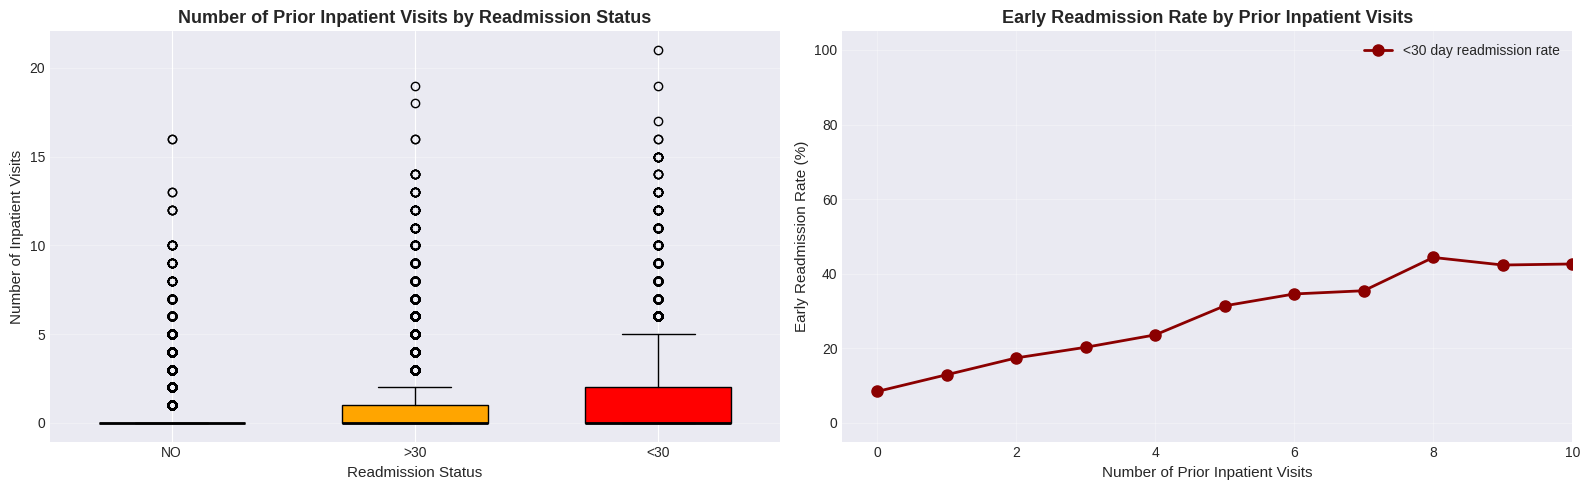

Early Readmission Rate by Number of Inpatient Visits (first 10):
number_inpatient
0    8.44
1   12.92
2   17.43
3   20.29
4   23.61
5   31.40
6   34.58
7   35.45
8   44.37
9   42.34
Name: readmitted, dtype: float64


In [28]:
# Readmission by number of inpatient visits (KEY FEATURE per Strack et al.)
fig, axes = plt.subplots(1, 2, figsize=(16, 5))

# Box plot
df_plot = df[['number_inpatient', 'readmitted']].copy()
for i, readmit_status in enumerate(['NO', '>30', '<30']):
    data = df_plot[df_plot['readmitted'] == readmit_status]['number_inpatient']
    axes[0].boxplot([data], positions=[i], widths=0.6, patch_artist=True,
                    boxprops=dict(facecolor=['lightgreen', 'orange', 'red'][i]),
                    medianprops=dict(color='black', linewidth=2))

axes[0].set_xticks([0, 1, 2])
axes[0].set_xticklabels(['NO', '>30', '<30'])
axes[0].set_title('Number of Prior Inpatient Visits by Readmission Status', fontsize=13, fontweight='bold')
axes[0].set_xlabel('Readmission Status', fontsize=11)
axes[0].set_ylabel('Number of Inpatient Visits', fontsize=11)
axes[0].grid(axis='y', alpha=0.3)

# Readmission rate by number of inpatient visits
inpatient_groups = df.groupby('number_inpatient')['readmitted'].apply(
    lambda x: (x == '<30').sum() / len(x) * 100
)

axes[1].plot(inpatient_groups.index, inpatient_groups.values, marker='o',
            linewidth=2, markersize=8, color='darkred', label='<30 day readmission rate')
axes[1].set_title('Early Readmission Rate by Prior Inpatient Visits', fontsize=13, fontweight='bold')
axes[1].set_xlabel('Number of Prior Inpatient Visits', fontsize=11)
axes[1].set_ylabel('Early Readmission Rate (%)', fontsize=11)
axes[1].grid(True, alpha=0.3)
axes[1].legend()
axes[1].set_xlim(-0.5, 10)  # Limit x-axis for better visibility

plt.tight_layout()
plt.savefig('../figures/data_exploration/readmission_by_inpatient.png', dpi=300, bbox_inches='tight')
plt.show()

print("Early Readmission Rate by Number of Inpatient Visits (first 10):")
print("=" * 60)
print(inpatient_groups.head(10))

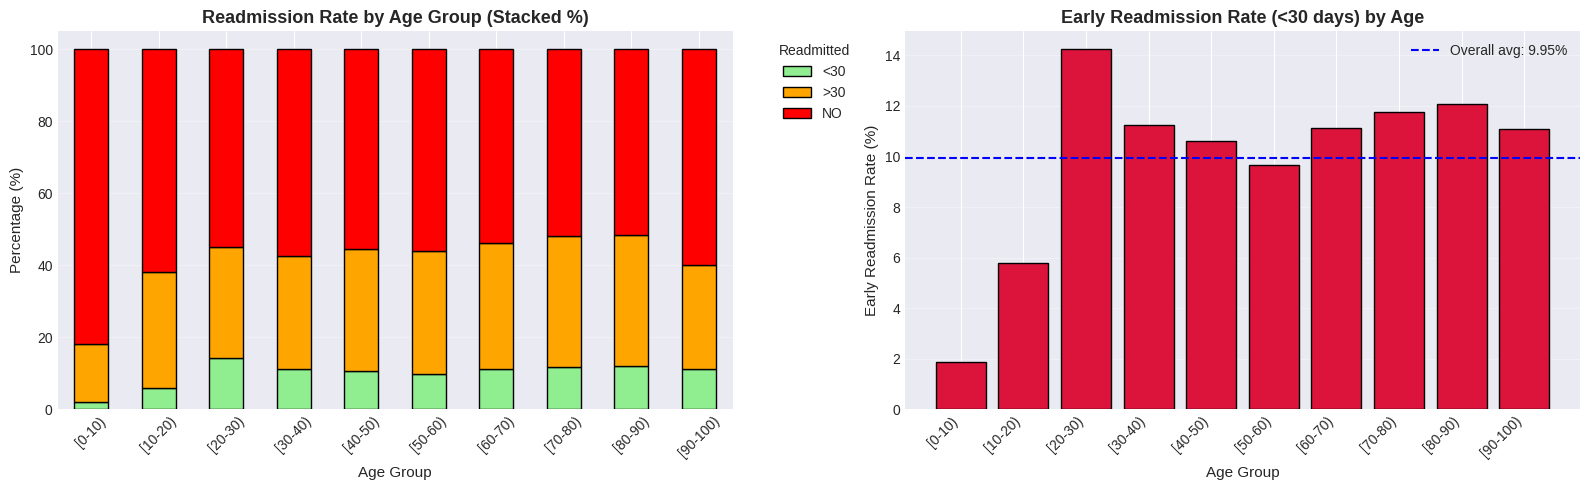

Early Readmission Rate by Age Group:
age
[20-30)    14.24
[80-90)    12.08
[70-80)    11.77
[30-40)    11.23
[60-70)    11.13
[90-100)   11.10
[40-50)    10.60
[50-60)     9.67
[10-20)     5.79
[0-10)      1.86
dtype: float64


In [29]:
# Readmission rate by age group
age_readmit = pd.crosstab(df['age'], df['readmitted'], normalize='index') * 100

fig, axes = plt.subplots(1, 2, figsize=(16, 5))

# Stacked bar chart
age_readmit.plot(kind='bar', stacked=True, ax=axes[0], color=['lightgreen', 'orange', 'red'], edgecolor='black')
axes[0].set_title('Readmission Rate by Age Group (Stacked %)', fontsize=13, fontweight='bold')
axes[0].set_xlabel('Age Group', fontsize=11)
axes[0].set_ylabel('Percentage (%)', fontsize=11)
axes[0].legend(title='Readmitted', bbox_to_anchor=(1.05, 1), loc='upper left')
axes[0].tick_params(axis='x', rotation=45)
axes[0].grid(axis='y', alpha=0.3)

# Focus on <30 day readmission rate
age_early_readmit = (df.groupby('age')['readmitted'].apply(lambda x: (x == '<30').sum()) /
                     df['age'].value_counts()) * 100
age_early_readmit = age_early_readmit.sort_index()

axes[1].bar(range(len(age_early_readmit)), age_early_readmit.values, color='crimson', edgecolor='black')
axes[1].set_xticks(range(len(age_early_readmit)))
axes[1].set_xticklabels(age_early_readmit.index, rotation=45, ha='right')
axes[1].set_title('Early Readmission Rate (<30 days) by Age', fontsize=13, fontweight='bold')
axes[1].set_xlabel('Age Group', fontsize=11)
axes[1].set_ylabel('Early Readmission Rate (%)', fontsize=11)
axes[1].grid(axis='y', alpha=0.3)
axes[1].axhline(y=age_early_readmit.mean(), color='blue', linestyle='--',
                label=f'Overall avg: {age_early_readmit.mean():.2f}%')
axes[1].legend()

plt.tight_layout()
plt.savefig('../figures/data_exploration/readmission_by_age.png', dpi=300, bbox_inches='tight')
plt.show()

print("Early Readmission Rate by Age Group:")
print("=" * 60)
print(age_early_readmit.sort_values(ascending=False))

### 3.4 Bivariate Analysis - Features vs Readmission

This is the most critical part of EDA - understanding which features are associated with readmission risk. We'll analyze the features identified as important in Strack et al. (2014):
- Number of inpatient visits
- Number of diagnoses  
- HbA1c test
- Discharge disposition
- Number of procedures
- Time in hospital
- Age group

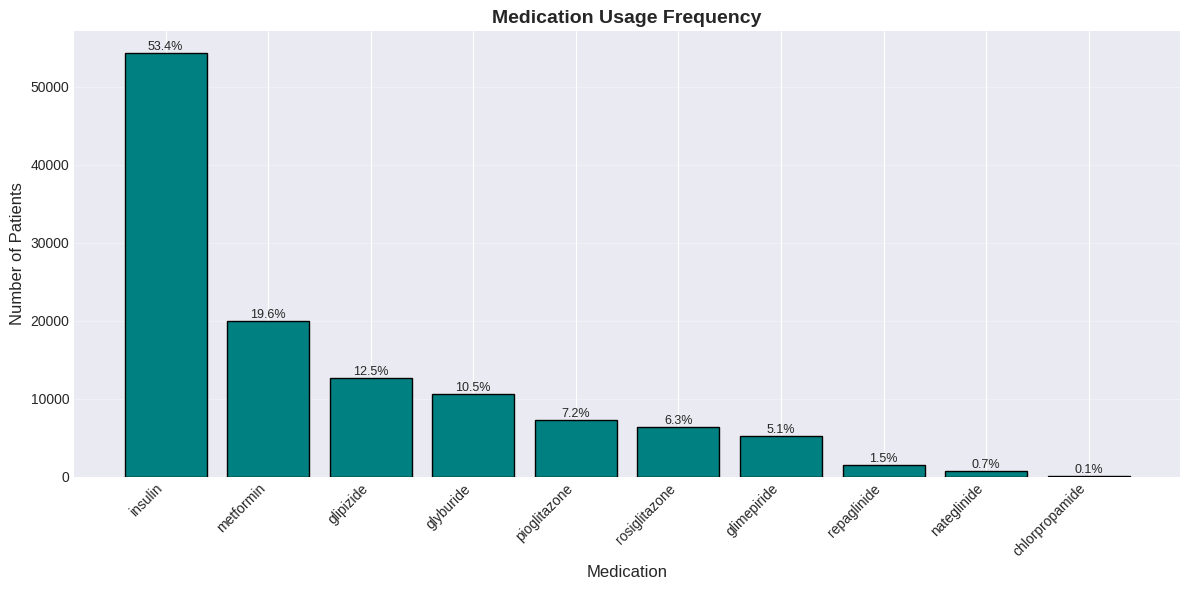

Medication Usage Summary:
                Patient_Count  Percentage
insulin                 54383       53.44
metformin               19988       19.64
glipizide               12686       12.47
glyburide               10650       10.47
pioglitazone             7328        7.20
rosiglitazone            6365        6.25
glimepiride              5191        5.10
repaglinide              1539        1.51
nateglinide               703        0.69
chlorpropamide             86        0.08


In [30]:
# Analyze medication features - check which medications are most commonly prescribed
medication_cols = ['metformin', 'repaglinide', 'nateglinide', 'chlorpropamide', 'glimepiride',
                   'glipizide', 'glyburide', 'pioglitazone', 'rosiglitazone', 'insulin']

# Count how many patients are on each medication (not "No")
med_usage = {}
for med in medication_cols:
    med_usage[med] = (df[med] != 'No').sum()

med_df = pd.DataFrame.from_dict(med_usage, orient='index', columns=['Patient_Count'])
med_df['Percentage'] = (med_df['Patient_Count'] / len(df)) * 100
med_df = med_df.sort_values('Patient_Count', ascending=False)

# Visualize
fig, ax = plt.subplots(figsize=(12, 6))
bars = ax.bar(range(len(med_df)), med_df['Patient_Count'], color='teal', edgecolor='black')
ax.set_xticks(range(len(med_df)))
ax.set_xticklabels(med_df.index, rotation=45, ha='right')
ax.set_title('Medication Usage Frequency', fontsize=14, fontweight='bold')
ax.set_xlabel('Medication', fontsize=12)
ax.set_ylabel('Number of Patients', fontsize=12)
ax.grid(axis='y', alpha=0.3)

# Add percentage labels
for i, (idx, row) in enumerate(med_df.iterrows()):
    ax.text(i, row['Patient_Count'], f"{row['Percentage']:.1f}%",
            ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.savefig('../figures/data_exploration/medication_usage.png', dpi=300, bbox_inches='tight')
plt.show()

print("Medication Usage Summary:")
print("=" * 60)
print(med_df)

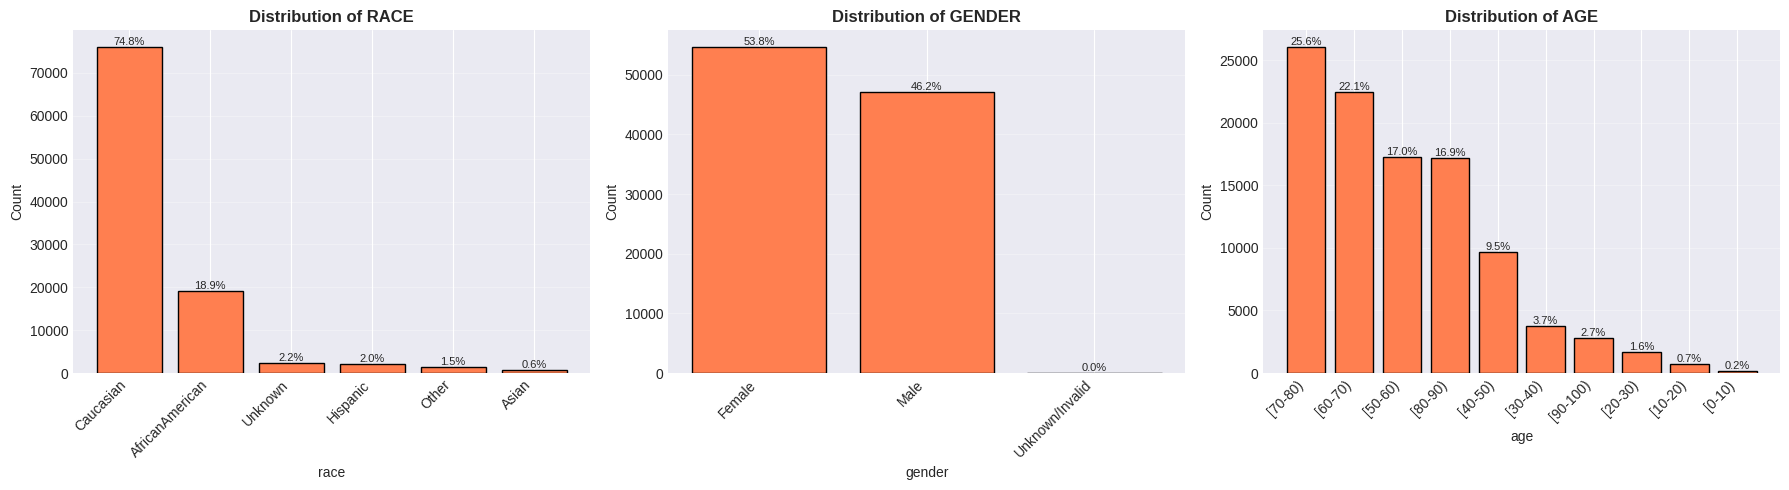


RACE Distribution:
                 Count  Percentage
race                              
Caucasian        76099       74.78
AfricanAmerican  19210       18.88
?                 2273        2.23
Hispanic          2037        2.00
Other             1506        1.48
Asian              641        0.63

GENDER Distribution:
                 Count  Percentage
gender                            
Female           54708       53.76
Male             47055       46.24
Unknown/Invalid      3        0.00

AGE Distribution:
          Count  Percentage
age                        
[70-80)   26068       25.62
[60-70)   22483       22.09
[50-60)   17256       16.96
[80-90)   17197       16.90
[40-50)    9685        9.52
[30-40)    3775        3.71
[90-100)   2793        2.74
[20-30)    1657        1.63
[10-20)     691        0.68
[0-10)      161        0.16


In [31]:
# Analyze key categorical features
key_categorical = ['race', 'gender', 'age']

fig, axes = plt.subplots(1, 3, figsize=(18, 5))

for idx, col in enumerate(key_categorical):
    # Replace '?' with 'Unknown' for cleaner visualization
    data = df[col].replace('?', 'Unknown')
    value_counts = data.value_counts()

    axes[idx].bar(range(len(value_counts)), value_counts.values, color='coral', edgecolor='black')
    axes[idx].set_xticks(range(len(value_counts)))
    axes[idx].set_xticklabels(value_counts.index, rotation=45, ha='right')
    axes[idx].set_title(f'Distribution of {col.upper()}', fontsize=12, fontweight='bold')
    axes[idx].set_xlabel(col, fontsize=10)
    axes[idx].set_ylabel('Count', fontsize=10)
    axes[idx].grid(axis='y', alpha=0.3)

    # Add percentage labels on bars
    for i, v in enumerate(value_counts.values):
        pct = (v / len(df)) * 100
        axes[idx].text(i, v, f'{pct:.1f}%', ha='center', va='bottom', fontsize=8)

plt.tight_layout()
plt.savefig('../figures/data_exploration/demographics_distribution.png', dpi=300, bbox_inches='tight')
plt.show()

# Print detailed statistics
for col in key_categorical:
    print(f"\n{col.upper()} Distribution:")
    print("=" * 60)
    value_counts = df[col].value_counts()
    pct = (value_counts / len(df)) * 100
    summary = pd.DataFrame({'Count': value_counts, 'Percentage': pct})
    print(summary)